###  Create dummy data
This noteboooks creates dummy demographic data from real MELD database

In [235]:
# Import packages
import pool.paths as paths
import os
import numpy as np
import pandas as pd
import random
from sklearn.impute import SimpleImputer

In [243]:
# Load demographics csv file. Preprocessing including QC has already occured
demographics=pd.read_csv(os.path.join(paths.data_dir,'demographics_qc.csv'))
demographics

,ID,Age of onset,Duration,Age at preoperative,Sex,Ever reported MRI negative,Engel Outcome,Surgery,f/u,Lesion area,Hemisphere,Lobe,Histology,Seizure free,lesion_masked
0,MELD_H2_15T_FCD_0001,15.0,5.0,20.0,1.0,0.0,1.0,1.0,5.0,0.003480,lh,temporal,NaN,1.0,1
1,MELD_H2_15T_FCD_0002,6.0,3.0,9.0,0.0,0.0,1.0,1.0,1.0,0.019576,lh,frontal,NaN,1.0,1
2,MELD_H2_15T_FCD_0003,0.9,9.1,10.0,0.0,0.0,NaN,0.0,NaN,0.026009,rh,temporal,NaN,NaN,1
3,MELD_H2_15T_FCD_0005,7.0,13.0,20.0,1.0,0.0,NaN,0.0,NaN,0.000706,lh,temporal,NaN,NaN,1
4,MELD_H2_15T_FCD_0006,12.0,7.0,19.0,0.0,0.0,NaN,0.0,NaN,0.010151,rh,frontal,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,MELD_H26_3T_FCD_0002,6.0,4.0,10.0,0.0,1.0,4.0,1.0,2.0,0.054952,rh,frontal,FCD_2B,0.0,1
576,MELD_H26_3T_FCD_0003,6.0,1.0,7.0,1.0,0.0,1.0,1.0,2.0,0.005742,lh,frontal,FCD_2B,1.0,1
577,MELD_H26_3T_FCD_0004,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,0.146083,lh,temporal,FCD_2A,1.0,1
578,MELD_H26_3T_FCD_0007,1.0,5.0,6.0,1.0,1.0,1.0,1.0,0.0,0.093497,lh,temporal,FCD_1,1.0,1


In [244]:
# shuffle data and add noise
keys= list(set(demographics))
keys
keys.remove('ID')
keys.remove('Age at preoperative')   # depends on the age of onset and duration

X= demographics[keys]

X_shuf= pd.DataFrame()
X_nois=pd.DataFrame()
for col in keys:
    column = np.array(X[col].copy())
    #shuffle each column
    random.shuffle(column)
    X_shuf[col]=column   
    #add noise to each column
    if col in ['Age of onset', 'Duration', 'f/u']:
        noise = np.random.rand(len(column))
        X_nois[col]=np.round(column+noise, 1)
    elif col in ['Lesion area']:
        noise = np.random.rand(len(column))
        noise = noise*0.01
        X_nois[col]=np.round(column+noise,4)
    else: 
        X_nois[col]=column

# impute age preoperative
dummy = X_nois.copy()
dummy['Age at preoperative'] =  dummy['Duration'] + dummy['Age of onset']

# add ID
dummy['ID']=['dummy_{}'.format(x) for x in range(0,len(dummy))]

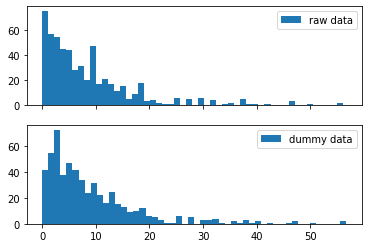

In [246]:
# check distribution 
fig, axes = plt.subplots(2, 1, sharex=True)
distribs = [X, dummy]
labels = ['raw data', 'dummy data']
feat = ['Age of onset']

for i, d in enumerate(distribs):
#     data = d[d['Histology']=='FCD_2A'][feat]   #to check in function of the histology
    data = d[feat]
    axes[i].hist(data, bins=50, label=labels[i])
    axes[i].legend()

In [247]:
# save new matrix 
file = os.path.join(paths.data_dir,'dummy_demographics.csv')
dummy.to_csv(file)   
